<a href="https://colab.research.google.com/github/ferngonzalezp/turbulence-GAN/blob/master/lstm_gan_isoturb1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

In [ ]:
from __future__ import print_function
#%matplotlib inline
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML


# Set random seem for reproducibility
manualSeed = 999
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

Random Seed:  999


In [ ]:
buffer_size = 1
u = np.zeros((buffer_size,128,128,128))
v = np.zeros((buffer_size,128,128,128))
w = np.zeros((buffer_size,128,128,128))
for i in range(buffer_size):
  u[i] = (np.load('/content/drive/My Drive/turbulent_data/%d/u_cbc_128.128.128_10000_modes.npy' %(i)))
  v[i] = (np.load('/content/drive/My Drive/turbulent_data/%d/v_cbc_128.128.128_10000_modes.npy' %(i)))
  w[i] = (np.load('/content/drive/My Drive/turbulent_data/%d/w_cbc_128.128.128_10000_modes.npy' %(i)))

In [ ]:
field = torch.tensor((u,v,w),dtype=torch.float32)
field = field.transpose(0,1)
field.shape

torch.Size([1, 3, 128, 128, 128])

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/open?id=14YO19ftGkb0Jm28JGGdHJdE5OeBb8BbP' # The shareable link

In [ ]:
fluff, id = link.split('=')

print (id) # Verify that you have everything after '='

14YO19ftGkb0Jm28JGGdHJdE5OeBb8BbP


In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('tkespec.py')  

In [ ]:
import tkespec

In [ ]:
lx = 2*np.pi*9/100
ly = lx
lz = lx

In [ ]:
knyquist, wave_numbers, tke_spectrum = tkespec.compute_tke_spectrum(u[0],v[0],w[0],lx,ly,lz,True)

knorm =  11.111111111111109


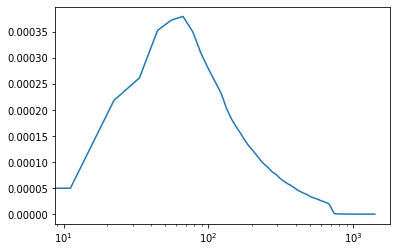

In [ ]:
plt.xscale("log")
plt.plot(wave_numbers,tke_spectrum)

In [ ]:
def cov(x,y):
  term1 = torch.mean(x@y.transpose(1,2),dim=(0,1))
  term2 = torch.mean(x,dim=(0,1))@torch.mean(y,dim=(0,1)).transpose(2,3)
  return term1 - term2

In [ ]:
def point_corr(x,y):
  vx = x - torch.mean(x)
  vy = y - torch.mean(y)

  return torch.mean(vx * vy,dim=(0,1,3)) / (torch.sqrt(torch.mean(vx ** 2, dim=(0,1,3))) * torch.sqrt(torch.mean(vy ** 2,dim=(0,1,3))))

In [ ]:
def stream_m(x):
  return torch.mean(x, dim=(0,1,3))

In [ ]:
def rms(x):
  return torch.mean(x**2, dim=(0,1,3))

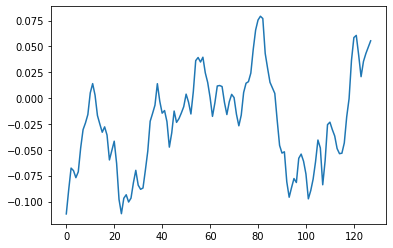

In [ ]:
Ruv = point_corr(field[:,0],field[:,1])
plt.plot(Ruv)

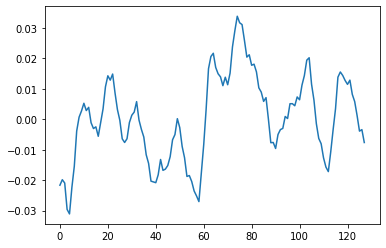

In [ ]:
stream_mu = stream_m(field[:,0])
plt.plot(stream_mu)

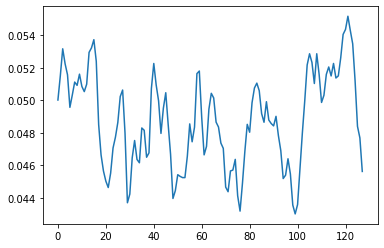

In [ ]:
rms_u = rms(field[:,0])
plt.plot(rms_u)

#Extract 1D signal from flow field

In [ ]:
train_sigs = field[:,0].reshape(field.shape[0]*128*128,1,128)

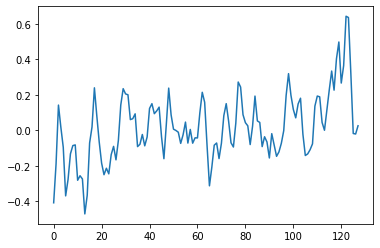

In [ ]:
plt.plot(train_sigs[np.random.randint(0,train_sigs.shape[0]),0])

In [ ]:
print(torch.mean(train_sigs[:,0]))
print(torch.std(train_sigs[:,0]))

tensor(0.0004)
tensor(0.2208)


In [ ]:
def auto_cor(v):
  v = v.detach()
  result = 0
  for i in range(v.shape[0]):
    result += np.correlate(v[i],v[i],mode='full')
  result /= v.shape[0]
  result =  torch.tensor(result)
  return result/result.max()

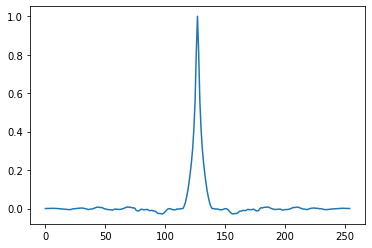

In [ ]:
Ruu = auto_cor(train_sigs[:,0,:])
plt.plot(Ruu)

In [ ]:
knyquist, wave_numbers, tke_spectrum = tkespec.compute_tke_spectrum_1d(u[0],lx,ly,lz,True)

Streaming output truncated to the last 5000 lines.
k =  41
k =  40
k =  40
k =  40
k =  40
k =  40
k =  40
k =  39
k =  39
k =  39
k =  39
k =  39
k =  39
k =  39
k =  40
k =  40
k =  40
k =  40
k =  41
k =  41
k =  41
k =  41
k =  42
k =  42
k =  43
k =  43
k =  43
k =  44
k =  44
k =  45
k =  45
k =  46
k =  46
k =  47
k =  47
k =  48
k =  49
k =  49
k =  50
k =  50
k =  51
k =  52
k =  52
k =  53
k =  54
k =  54
k =  55
k =  56
k =  57
k =  57
k =  58
k =  59
k =  60
k =  60
k =  61
k =  62
k =  63
k =  63
k =  64
k =  65
k =  66
k =  67
k =  67
k =  68
k =  69
k =  70
k =  71
k =  72
k =  72
k =  73
k =  74
k =  75
k =  74
k =  73
k =  72
k =  72
k =  71
k =  70
k =  69
k =  68
k =  67
k =  67
k =  66
k =  65
k =  64
k =  63
k =  63
k =  62
k =  61
k =  60
k =  60
k =  59
k =  58
k =  57
k =  57
k =  56
k =  55
k =  54
k =  54
k =  53
k =  52
k =  52
k =  51
k =  50
k =  50
k =  49
k =  49
k =  48
k =  47
k =  47
k =  46
k =  46
k =  45
k =  45
k =  44
k =  44
k =  43
k =  43
k =  

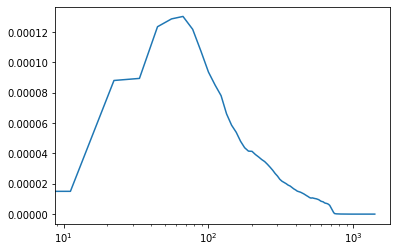

In [ ]:
plt.xscale('log')
plt.plot(wave_numbers,tke_spectrum)

#Learning 1D Turbulent signal with GAN
 

In [ ]:
# Set random seem for reproducibility
manualSeed = 999
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

Random Seed:  999


In [ ]:
# Batch size during training
batch_size = 128

# Size of z latent vector (i.e. size of generator input)
nz = 1

# Number of training epochs
num_epochs = 40

# Learning rate for optimizers
lr = 0.0001

# Beta1 hyperparam for Adam optimizers
beta1 = 0.0

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1

ncritic = 5

In [ ]:
#Create Dataset
dataset = torch.utils.data.TensorDataset(train_sigs)
#Create DataLoader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True)

In [ ]:
# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

In [ ]:
# custom weights initialization called on netG and netD
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Linear') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)

## Generator

In [ ]:
class Generator(nn.Module):
    def __init__(self,ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.hidden_dim = 256
        self.lstm_cell = nn.LSTMCell(1+1,self.hidden_dim)
        self.fc2 = nn.Sequential(
            nn.Linear(self.hidden_dim,1,bias=False),
        )
        def init_hidden(self, batch_size):
          ''' Initialize hidden state '''
          # create NEW tensor with SAME TYPE as weight
          weight = next(self.parameters()).data

          if (self.ngpu >= 1):
              
              hidden = ((weight.new(batch_size, self.hidden_dim).normal_(mean=0,std=0.2).cuda(),
                        weight.new(batch_size, self.hidden_dim).normal_(mean=0,std=0.2).cuda()),
                        (weight.new(batch_size, self.hidden_dim).normal_(mean=0,std=0.2).cuda(),
                        weight.new(batch_size, self.hidden_dim).normal_(mean=0,std=0.2).cuda()))

          else:
              hidden = ((weight.new(batch_size, self.hidden_dim).normal_(mean=0,std=0.2),
                        weight.new(batch_size, self.hidden_dim).normal_(mean=0,std=0.2)),
                        (weight.new(batch_size, self.hidden_dim).normal_(mean=0,std=0.2),
                        weight.new(batch_size, self.hidden_dim).normal_(mean=0,std=0.2)))

          return hidden
    def forward(self, z, n_points):
        l_size = z.size()
        output = torch.empty((l_size[0],l_size[1],n_points)).to(device)
        for j in range(z.shape[1]):
          h_0 = torch.randn(l_size[0],self.hidden_dim).to(device)
          c_0 = torch.randn(l_size[0],self.hidden_dim).to(device)
          y_0 = torch.randn((l_size[0],1)).to(device)*0.2
          seq = y_0
          for i in range(n_points-1):
            noise = torch.cat((z[:,j,i].unsqueeze(1),y_0),dim=1)
            h_0, c_0 = self.lstm_cell(noise,(h_0,c_0))
            y_0 = self.fc2(h_0)
            seq = torch.cat((seq,y_0),dim=1)
          seq = torch.reshape(seq,(l_size[0],n_points))
          output[:,j,:] = seq
        return output

In [ ]:
# Create the generator
netG = Generator(ngpu).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    netG = nn.DataParallel(netG, list(range(ngpu)))

netG.apply(weights_init)

# Print the model
print(netG)

Generator(
  (lstm_cell): LSTMCell(2, 256)
  (fc2): Sequential(
    (0): Linear(in_features=256, out_features=1, bias=False)
  )
)


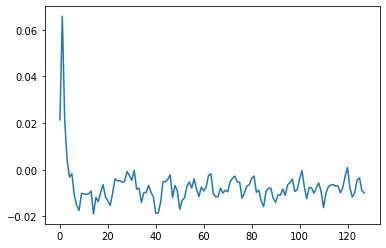

In [ ]:
z = torch.randn(128,1,128,device=device)
gen_sig = netG(z,128)
plt.plot(gen_sig[0,0,:].cpu().detach().numpy())

## Discriminator

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is nz x 1 x 1
            (nn.Conv2d(128, 64 * 4, (5,1), (2,1), (2,0), bias=False)),
            nn.LeakyReLU(0.2,inplace=True),
            # state size. (ndf*2) x 1 x 1
            (nn.Conv2d(64 * 4, 64 * 2, (5,1), (2,1), (2,0), bias=False)),
            nn.LeakyReLU(0.2,inplace=True),
            # state size. (ndf*4) x 1 x 1
            (nn.Conv2d(64 * 2, 64, (5,1), (2,1), (2,0), bias=False)),
            nn.LeakyReLU(0.2,inplace=True),
            (nn.Conv2d(64, 1, (5,1), (2,1), (2,0), bias=False)),
 
        )

    def forward(self, noise):
        l_size = noise.size()
        noise = torch.reshape(noise,(l_size[0],128,l_size[1],1))
        return self.main(noise)

In [ ]:
# Create the Discriminator
netD = Discriminator(ngpu).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    netD = nn.DataParallel(netD, list(range(ngpu)))

netD.apply(weights_init)

# Print the model
print(netD)

Discriminator(
  (main): Sequential(
    (0): Conv2d(128, 256, kernel_size=(5, 1), stride=(2, 1), padding=(2, 0), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(256, 128, kernel_size=(5, 1), stride=(2, 1), padding=(2, 0), bias=False)
    (3): LeakyReLU(negative_slope=0.2, inplace=True)
    (4): Conv2d(128, 64, kernel_size=(5, 1), stride=(2, 1), padding=(2, 0), bias=False)
    (5): LeakyReLU(negative_slope=0.2, inplace=True)
    (6): Conv2d(64, 1, kernel_size=(5, 1), stride=(2, 1), padding=(2, 0), bias=False)
  )
)


In [ ]:
prob = netD(train_sigs.to(device))
print(prob.mean())
print(prob)

tensor(-0.0002, device='cuda:0', grad_fn=<MeanBackward0>)
tensor([[[[-0.0006]]],


        [[[-0.0004]]],


        [[[-0.0003]]],


        ...,


        [[[-0.0001]]],


        [[[-0.0002]]],


        [[[-0.0003]]]], device='cuda:0', grad_fn=<CudnnConvolutionBackward>)


## GAN

In [ ]:
# Initialize loss function
def criterion(y):
  return torch.mean(y)
# Setup Adam optimizers for both G and D
betas=(beta1, 0.9)
optimizerD =  optim.Adam(netD.parameters(), lr=lr,betas=betas)
optimizerG = optim.Adam(netG.parameters(), lr=lr,betas=betas)

In [ ]:
mean_real = torch.mean(train_sigs,dim=0)
def stat_constraint(x):
  meanx = torch.mean(x,dim=0)
  meany = mean_real.to(device)
  return torch.norm(meanx-meany)

In [ ]:
def cov(y):
  b_size = y.shape[0]
  y = y.unsqueeze(-1)
  yt = torch.transpose(y,-2,-1)
  sigma = torch.mean(torch.matmul(y,yt),dim=0)-torch.matmul(torch.mean(y,dim=0),torch.mean(yt,dim=0))
  return sigma

In [ ]:
cov(train_sigs).shape

torch.Size([1, 128, 128])

In [ ]:
def stat_constraint4(x,y):
  sigmax = (cov(x))
  sigmay = (cov(y))
  return torch.norm(sigmax-sigmay)

In [ ]:
def score(x,y):
  covx = torch.mean(cov(x),dim=0)
  covy = torch.mean(cov(y),dim=0)
  term1 = torch.mean(((torch.mean(x,dim=1)-torch.mean(y,dim=1))**2)**0.5)
  term2 = torch.trace(covx+covy-2*(covx*covy)**0.5)
  return term1 + term2

In [ ]:
def spec_1D(u,lx,ly,lz,smooth=False):
  nx = u.shape[1]
  ny = u.shape[2]
  nz = u.shape[3]

  nt = nx * ny * nz
  n = max(nx, ny, nz)
  uh = torch.rfft(u,3,onesided=False) / nt

  tkeh = 0.5 * (uh[:,:,:,:,0]**2+uh[:,:,:,:,1]**2)

  length = max(lx, ly, lz)

  knorm = 2.0 * np.pi / length

  kxmax = nx / 2
  kymax = ny / 2
  kzmax = nz / 2

  wave_numbers = knorm * np.arange(0, n)
  tke_spectrum = torch.zeros(u.shape[0],len(wave_numbers)).to(device)
  if nx==ny==nz :
    for kx in range(-nx//2, nx//2-1):
          for ky in range(-ny//2, ny//2-1):
              for kz in range(-nz//2, nz//2-1):
                  rk = np.sqrt(kx**2 + ky**2 + kz**2)
                  k = int(np.round(rk))
                  tke_spectrum[:,k] += tkeh[:,kx, ky, kz]
  else:
    tke_spectrum = tkeh
  

  tke_spectrum = tke_spectrum / knorm
  if smooth == True:
    tke_spectrum = torch.reshape(tke_spectrum,(u.shape[0],1,n))
    window = torch.ones(1,1,5).to(device) / 5
    tkespecsmooth = nn.functional.conv1d(tke_spectrum,window,padding=2)
    tkespecsmooth[:,:,0:4] = tke_spectrum[:,:,0:4]
    tke_spectrum = tkespecsmooth
  if nx==ny==nz:
    return wave_numbers, torch.reshape(tke_spectrum,(u.shape[0],n))
  else:
    return wave_numbers, tke_spectrum

In [ ]:
def spec(u,lx,smooth=True):
  n = u.shape[2]
  u = u.reshape(u.shape[0],u.shape[2])
  uh = torch.rfft(u,1,onesided=False)/n
  spec = 0.5 * (uh[:,:,0]**2+uh[:,:,1]**2)
  k = 2.0 * np.pi / lx
  wave_numbers = k*np.arange(0,n)
  spec[:,int(n/2+1):] = 0

  if smooth == True:
    spec = torch.reshape(spec,(u.shape[0],1,n))
    window = torch.ones(1,1,5).to(device) / 5
    specsmooth = nn.functional.conv1d(spec,window,padding=2)
    specsmooth[:,:,0:4] = spec[:,:,0:4]
    spec = torch.reshape(specsmooth,(u.shape[0],n))

  return wave_numbers, spec

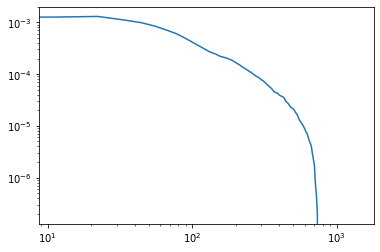

In [ ]:
k, E = spec(train_sigs.to(device),lx,True)
E = torch.mean(E,dim=0)
plt.xscale('log')
plt.yscale('log')
plt.plot(k,E.cpu().detach())

In [ ]:
def stat_cosntraint5(x):
  k, Ex = spec(x,lx)
  return torch.norm(Ex-E)

In [ ]:
stat_cosntraint5(fake)

tensor(0.0363, device='cuda:0', grad_fn=<NormBackward0>)

In [ ]:
uh = torch.rfft(torch.tensor(u),3,onesided=False)
tkeh = 0.5 * (uh[:,:,:,:,0]**2+uh[:,:,:,:,1]**2)

In [ ]:
def calc_gradient_penalty(netD, real_data, generated_data):
    # GP strength
    LAMBDA = 10

    b_size = real_data.size()[0]

    # Calculate interpolation
    alpha = torch.rand(b_size, nz, 128)
    alpha = alpha.expand_as(real_data)
    alpha = alpha.cuda()

    interpolated = alpha * real_data.data + (1 - alpha) * generated_data.data
    interpolated = torch.autograd.Variable(interpolated, requires_grad=True)
    interpolated = interpolated.cuda()

    # Calculate probability of interpolated examples
    prob_interpolated = netD(interpolated)

    # Calculate gradients of probabilities with respect to examples
    gradients = torch.autograd.grad(outputs=prob_interpolated, inputs=interpolated,
                           grad_outputs=torch.ones(prob_interpolated.size()).cuda(),
                           create_graph=True, retain_graph=True)[0]

    # Gradients have shape (batch_size, num_channels, img_width, img_height),
    # so flatten to easily take norm per example in batch
    gradients = gradients.view(b_size, -1)

    # Derivatives of the gradient close to 0 can cause problems because of
    # the square root, so manually calculate norm and add epsilon
    gradients_norm = torch.sqrt(torch.sum(gradients ** 2, dim=1) + 1e-12)

    # Return gradient penalty
    return LAMBDA * ((gradients_norm - 1) ** 2).mean()

In [ ]:
# Training Loop

# Lists to keep track of progress
img_list = []
G_losses = []
D_losses = []
Score = []
iters = 0
print("Starting Training Loop...")
# For each epoch
for epoch in range(num_epochs):
    # For each batch in the dataloader
    for i, data in enumerate(dataloader, start=0):
        
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        netD.zero_grad()
        # Format batch
        real_cpu = data[0].to(device)
        b_size = real_cpu.size()
        # Forward pass real batch through D
        output = netD(real_cpu)
        # Calculate loss on all-real batch
        errD_real = criterion(output)
        D_x = errD_real.item()

        ## Train with all-fake batch
        # Generate batch of latent vectors
        noise = torch.randn(b_size[0], nz, 128, device=device)
        # Generate fake image batch with G
        fake = netG(noise,128)
        # Classify all fake batch with D
        output = netD(fake)
        # Calculate D's loss on the all-fake batch
        errD_fake = criterion(output)
        D_G_z1 = errD_fake.item()
        #calculate gradient penalty
        grad_penalty = calc_gradient_penalty(netD,real_cpu,fake)
        #grad_penalty = calc_gradient_penalty(netD,real_cpu,fake,class_real)
        # Add the gradients and penalty from the all-real and all-fake batches
        errD = -errD_real + errD_fake + grad_penalty
        errD.backward()
        # Update D
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        if iters % ncritic == 0:
          netG.zero_grad()
          # Since we just updated D, perform another forward pass of all-fake batch through D
          noise = torch.randn(b_size[0], nz, 128, device=device)
          fake = netG(noise,128)
          output = netD(fake)
          # Calculate G's loss based on this output
          errG = -criterion(output) + stat_constraint4(fake,real_cpu) + 10*stat_cosntraint5(fake)
          # Calculate gradients for G
          errG.backward()
          D_G_z2 = errG.item()
          # Update G
          optimizerG.step()

          FID = score(real_cpu,fake)

        # Output training stats
        if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f \t FID: %.4f'
                  % (epoch, num_epochs, i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2,FID))
        
        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())
        Score.append(FID.item())
        iters += 1

Starting Training Loop...
[0/40][0/128]	Loss_D: 9.9786	Loss_G: 1.6009	D(x): -0.0002	D(G(z)): -0.0000 / 1.6009 	 FID: 6.1212
[0/40][50/128]	Loss_D: 8.6431	Loss_G: 1.5536	D(x): -0.0049	D(G(z)): -0.0004 / 1.5536 	 FID: 5.9032
[0/40][100/128]	Loss_D: 3.4854	Loss_G: 1.4953	D(x): -0.0248	D(G(z)): -0.0033 / 1.4953 	 FID: 5.6146
[1/40][0/128]	Loss_D: 0.7241	Loss_G: 1.5667	D(x): -0.0484	D(G(z)): -0.0042 / 1.5667 	 FID: 5.7969
[1/40][50/128]	Loss_D: -0.0194	Loss_G: 1.5520	D(x): 0.0049	D(G(z)): -0.0308 / 1.5520 	 FID: 5.2629
[1/40][100/128]	Loss_D: 0.0007	Loss_G: 1.5270	D(x): 0.0562	D(G(z)): 0.0169 / 1.5270 	 FID: 5.0435
[2/40][0/128]	Loss_D: -0.0033	Loss_G: 1.5706	D(x): 0.0704	D(G(z)): 0.0163 / 1.5706 	 FID: 5.1384
[2/40][50/128]	Loss_D: -0.0204	Loss_G: 1.6086	D(x): 0.0567	D(G(z)): -0.0372 / 1.6086 	 FID: 4.7286
[2/40][100/128]	Loss_D: 0.0942	Loss_G: 1.6262	D(x): 0.1388	D(G(z)): 0.0344 / 1.6262 	 FID: 4.7446
[3/40][0/128]	Loss_D: 0.0746	Loss_G: 1.3920	D(x): 0.1745	D(G(z)): 0.0549 / 1.3920 	 FID:

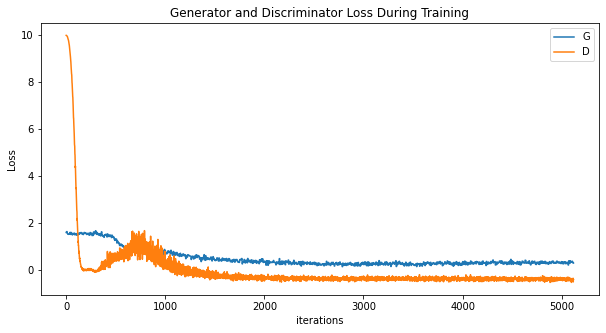

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

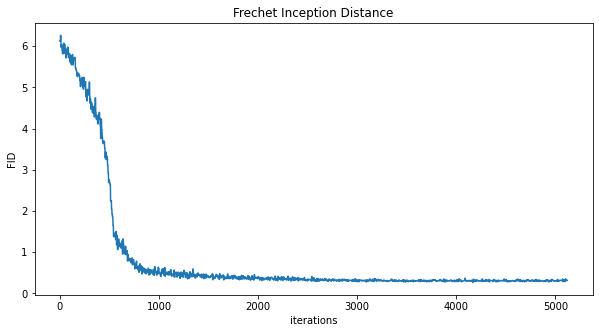

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Frechet Inception Distance")
plt.plot(Score)
plt.xlabel("iterations")
plt.ylabel("FID")
plt.show()

## Results

In [ ]:
device = torch.device("cpu")
netG.to(device)
netG.eval()
netG.requires_grad_(False)

Generator(
  (lstm_cell): LSTMCell(2, 256)
  (fc2): Sequential(
    (0): Linear(in_features=256, out_features=1, bias=False)
  )
)

In [ ]:
num_examples_to_generate = 128*128
#Generate u 
manualSeed = random.randint(1, 10000) # use if you want new results
random.seed(manualSeed)
torch.manual_seed(manualSeed)
noise = torch.randn(num_examples_to_generate,nz,128, device=device)
u_gen = netG(noise,128)
u_gen = u_gen.cpu().detach().numpy()

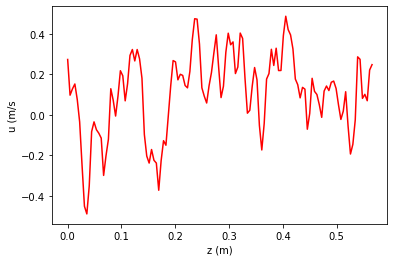

In [ ]:
plt.ylabel('u (m/s')
plt.xlabel('z (m)')
z = lz*np.linspace(0,1,128)
plt.plot(z,u_gen[np.random.randint(low=0,high=num_examples_to_generate),0,:],'r')

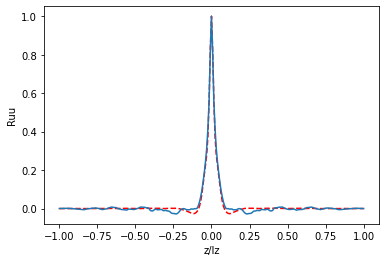

In [ ]:
Ruu_gen = auto_cor(torch.tensor(u_gen[:,0,:]))
plt.xlabel('z/lz')
plt.ylabel('Ruu')
dz = np.linspace(-1,1,255)
plt.plot(dz,Ruu_gen,'r--')
plt.plot(dz,Ruu)

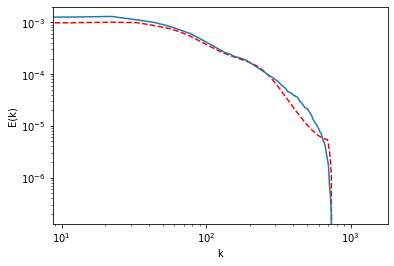

In [ ]:
wave_numbers, E_gen = spec(torch.tensor(u_gen),lx)
E_gen = E_gen.mean(dim=0)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('E(k)')
plt.plot(wave_numbers_gen,E_gen.detach(),'r--')
plt.plot(wave_numbers,E.cpu().detach())

In [ ]:
print(torch.mean(torch.tensor(u_gen)))
print(torch.std(torch.tensor(u_gen)))

tensor(-0.0028)
tensor(0.2065)
